## **Task**

### **Data Exploration**

Explore the dataset to get a general understanding of the data.

- Load the dataset using Pandas.
- Print the first 10 rows of the dataset.
- Display Statistical Summary. (show the summary for object data columns separately)
- Get the information, data types of all columns and the shape of the dataset (number of rows and columns).
- Display only Data types



In [1]:
import pandas as pd

In [4]:
path="/content/drive/MyDrive/Dataset/E-commerce-Customer-Behavior.csv";
df=pd.read_csv(path)
df.head(10)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


Display Statistical Summary. (show the summary for object data columns separately)

In [6]:
print(df.describe(include='object'))

        Gender      City Membership Type Satisfaction Level
count      350       350             350                348
unique       2         6               3                  3
top     Female  New York            Gold          Satisfied
freq       175        59             117                125


Get the information, data types of all columns and the shape of the dataset (number of rows and columns).

In [7]:
df_info = df.info()
df_shape = df.shape
print("\nDataFrame Information:")
print(df_info)
print("\nShape of the DataFrame:")
print(f"Number of rows: {df_shape[0]}, Number of columns: {df_shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB

DataFrame Information:
None

Shape of the DataFrame:
Number of rows: 350, Number of columns: 11


Display only Data types

In [8]:
data_types = df.dtypes
print("\nData Types of Each Column:")
print(data_types)


Data Types of Each Column:
Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object


### **Handling Missing Values**
Identify and deal with any missing data.

- Check for missing values in the dataset.
- If missing values exist, Show the rows with missing values.
- If missing values exist, Decide whether to fill them (using the mean, median, etc.) or drop them and justify your choice.


(3 Points)

In [9]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [10]:
if missing_values.any():
    print("\nRows with Missing Values:")
    print(df[df.isnull().any(axis=1)])


Rows with Missing Values:
     Customer ID  Gender  Age     City Membership Type  Total Spend  \
71           172  Female   37  Houston          Bronze        420.8   
143          244  Female   37  Houston          Bronze        430.8   

     Items Purchased  Average Rating  Discount Applied  \
71                 7             3.1             False   
143                7             3.4             False   

     Days Since Last Purchase Satisfaction Level  
71                         21                NaN  
143                        23                NaN  


### **Duplicates**

- Check for duplicate records in the dataset. If duplicates exist, remove them.

(1 Point)

In [11]:
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Records: {duplicates}")


Number of Duplicate Records: 0


### **Conditional Filtering**
Filter data based on specific conditions.

- How many customers have the Gold membership type?
- Filter and display customers who spent more than $1,000.
- Identify customers from New York who applied a discount.

( 3 points)

In [13]:
gold_membership_count = df[df['Membership Type'] == 'Gold'].shape[0]
print(f"\nNumber of Customers with Gold Membership: {gold_membership_count}")


Number of Customers with Gold Membership: 117


In [14]:
high_spenders = df[df['Total Spend'] > 1000]
print("\nCustomers who spent more than $1,000:")
print(high_spenders)


Customers who spent more than $1,000:
     Customer ID  Gender  Age           City Membership Type  Total Spend  \
0            101  Female   29       New York            Gold       1120.2   
3            104    Male   30  San Francisco            Gold       1480.3   
6            107  Female   31       New York            Gold       1150.6   
9            110    Male   28  San Francisco            Gold       1520.1   
12           113  Female   30       New York            Gold       1200.8   
..           ...     ...  ...            ...             ...          ...   
335          436  Female   30       New York            Gold       1200.8   
338          439    Male   30  San Francisco            Gold       1460.5   
341          442  Female   31       New York            Gold       1140.6   
344          445    Male   28  San Francisco            Gold       1480.1   
347          448  Female   30       New York            Gold       1190.8   

     Items Purchased  Average Rating

In [15]:
ny_discount_customers = df[(df['City'] == 'New York') & (df['Discount Applied'] == True)]
print("\nCustomers from New York who applied a discount:")
print(ny_discount_customers)


Customers from New York who applied a discount:
     Customer ID  Gender  Age      City Membership Type  Total Spend  \
0            101  Female   29  New York            Gold       1120.2   
6            107  Female   31  New York            Gold       1150.6   
12           113  Female   30  New York            Gold       1200.8   
18           119  Female   32  New York            Gold       1170.3   
24           125  Female   31  New York            Gold       1140.6   
30           131  Female   30  New York            Gold       1190.8   
36           137  Female   32  New York            Gold       1160.3   
42           143  Female   31  New York            Gold       1130.6   
48           149  Female   30  New York            Gold       1180.8   
54           155  Female   31  New York            Gold       1140.6   
60           161  Female   30  New York            Gold       1190.8   
66           167  Female   32  New York            Gold       1160.3   
72           17

### **Analysis**


 ( Hint: Group by, conditional filtering, Visualization )

##### Which membership type shows the highest total spending in the

*   List item
*   List item

dataset?  (2 Points)

Group the Data by Membership Type and Sum Total Spend

In [16]:
membership_spending = df.groupby('Membership Type')['Total Spend'].sum().reset_index()
print("\nTotal Spending by Membership Type:")
print(membership_spending)


Total Spending by Membership Type:
  Membership Type  Total Spend
0          Bronze      54913.1
1            Gold     153403.9
2          Silver      87566.6


Visulization

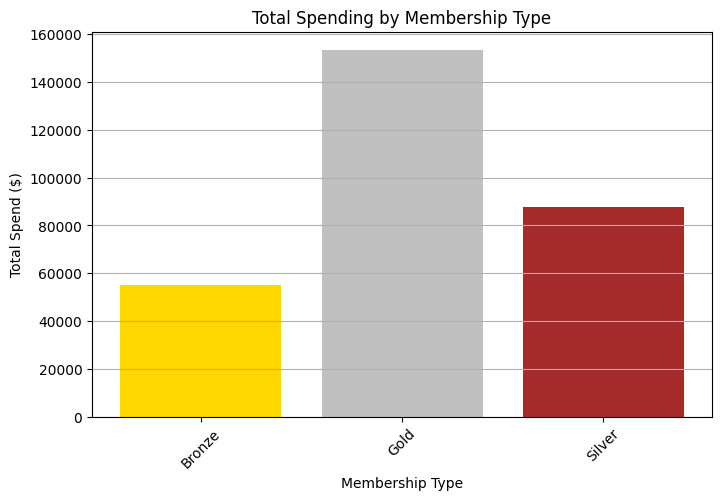

In [17]:
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(8, 5))
plt.bar(membership_spending['Membership Type'], membership_spending['Total Spend'], color=['gold', 'silver', 'brown'])
plt.title('Total Spending by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### How does customer satisfaction impact total spending across different membership types? Which membership type spends more based on satisfaction levels? (2 Points)

Group the Data by Membership Type and Satisfaction Level, and Sum Total Spend

In [18]:
satisfaction_spending = df.groupby(['Membership Type', 'Satisfaction Level'])['Total Spend'].sum().unstack()
print("\nTotal Spending by Membership Type and Satisfaction Level:")
print(satisfaction_spending)


Total Spending by Membership Type and Satisfaction Level:
Satisfaction Level  Neutral  Satisfied  Unsatisfied
Membership Type                                    
Bronze              25068.3        NaN      28993.2
Gold                    NaN   153403.9          NaN
Silver              40888.0     6636.0      40042.6


Visulization

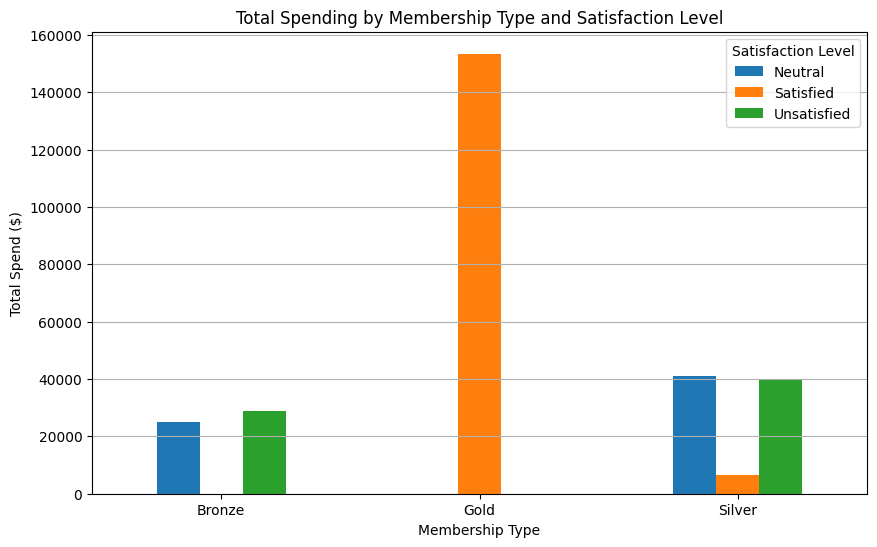

In [19]:
import matplotlib.pyplot as plt

#visulization
satisfaction_spending.plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending by Membership Type and Satisfaction Level')
plt.xlabel('Membership Type')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=0)
plt.legend(title='Satisfaction Level')
plt.grid(axis='y')
plt.show()

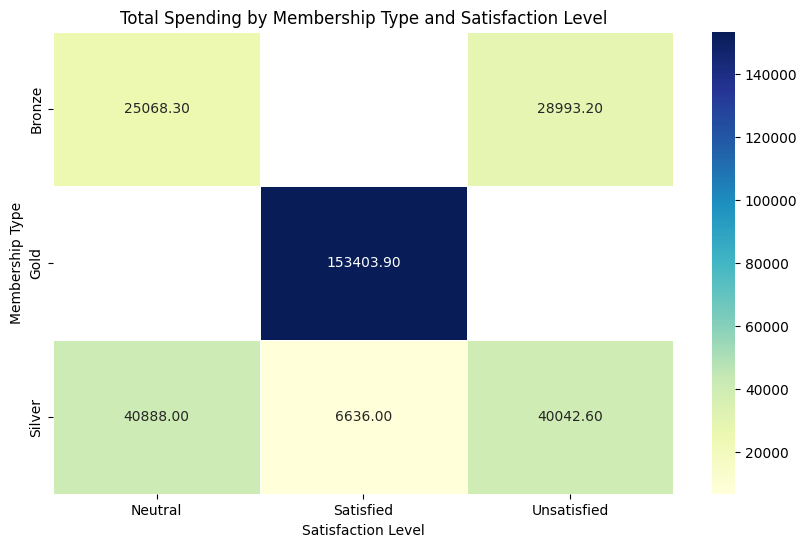

In [20]:
import seaborn as sns

#Visulization
plt.figure(figsize=(10, 6))
sns.heatmap(satisfaction_spending, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Total Spending by Membership Type and Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Membership Type')
plt.show()

#### What is the average rating for customers who applied discounts, and

1.   List item
2.   List item

does the membership type have any effect on the ratings? (2 points)

Filter the Data for Customers Who Applied Discounts

In [21]:
discounted_customers = df[df['Discount Applied'] == True]
average_rating_discounted = discounted_customers['Average Rating'].mean()
print(f"\nAverage Rating for Customers Who Applied Discounts: {average_rating_discounted:.2f}")


Average Rating for Customers Who Applied Discounts: 3.98


 Group by Membership Type and Calculate Average Ratings

In [22]:
average_rating_by_membership = df.groupby('Membership Type')['Average Rating'].mean()
print("\nAverage Ratings by Membership Type:")
print(average_rating_by_membership)


Average Ratings by Membership Type:
Membership Type
Bronze    3.325000
Gold      4.675214
Silver    4.051282
Name: Average Rating, dtype: float64


Visulization

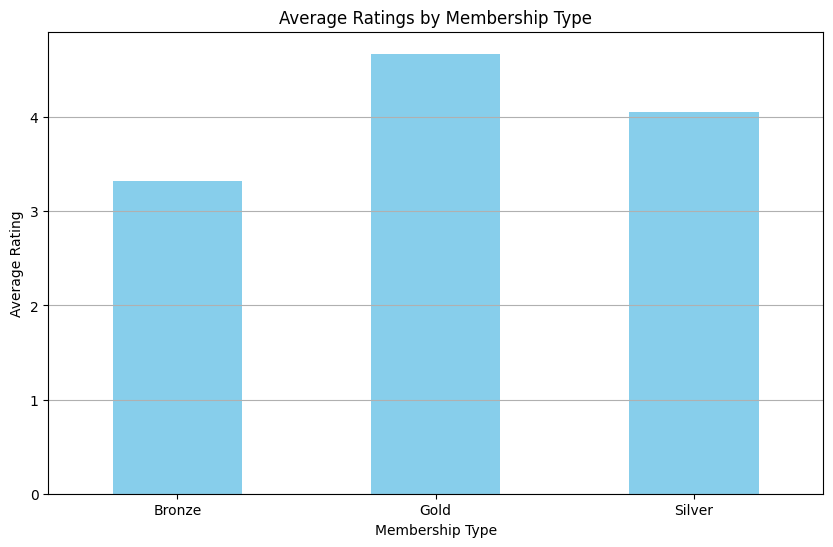

In [23]:
average_rating_by_membership.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Ratings by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### Analyze the Impact of Days Since Last Purchase on Satisfaction Level (2 Points)

Group by Satisfaction Level

In [24]:
average_days_since_last_purchase = df.groupby('Satisfaction Level')['Days Since Last Purchase'].mean()
print("\nAverage Days Since Last Purchase by Satisfaction Level:")
print(average_days_since_last_purchase)


Average Days Since Last Purchase by Satisfaction Level:
Satisfaction Level
Neutral        19.289720
Satisfied      17.696000
Unsatisfied    42.982759
Name: Days Since Last Purchase, dtype: float64


Visulization

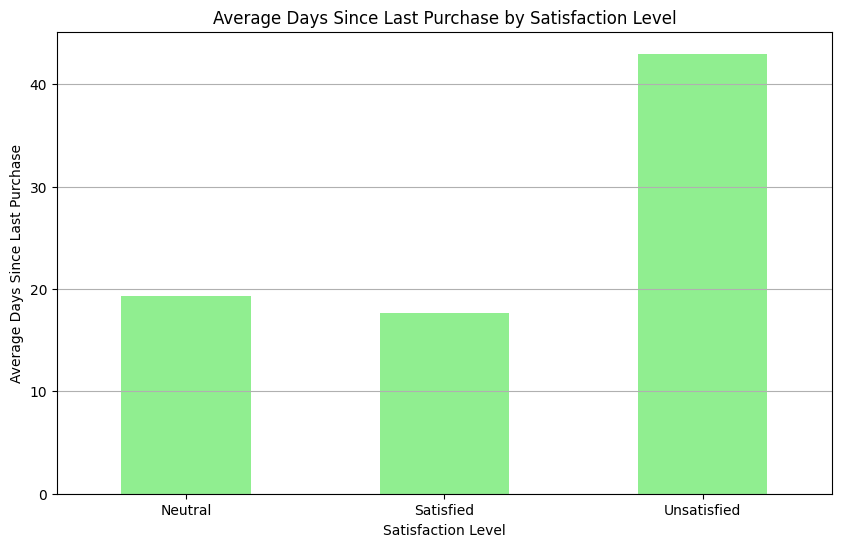

In [25]:
average_days_since_last_purchase.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Average Days Since Last Purchase by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Days Since Last Purchase')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()